# Plotting

## Funksjonar med delt forskrift

Nokre funksjonar kan ha ulik definisjon på ulike intervall. Desse kallar me funksjonar med delt forskrift. Me ser på funksjonen

$$f(x) = \begin{cases}
x^2 & \text{for } x \leq 0 \\
x & \text{for } x > 0
\end{cases}$$

Denne kan definerast med `numpy.piecewise()`. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Startar med å definera funksjonen. Det gjer me med
 
```{python}
numpy.piecewise(x, condlist, funclist)
```

der `condlist` er ei liste med betingelse/intervall og `funclist` funksjonane i same rekkefølge

In [12]:
def f(x):
    return np.piecewise(x, [x <= 0, x > 0], [lambda x: x**2, lambda x: x])

::: {.callout-tip collapse="true"} 
## Kva er `lambda`?

`lambda x:` er kortversjonen av 


In [13]:
#| eval: false
def g(x):
    return x**2

Dermed kan me heller definera funksjonen slik:

In [14]:
#| eval: false
x = np.linspace(-3,2,5)
g = lambda x: x**2

y = g(x)

:::

Lagar ein array med 100 $x$-verdiar og finn vidare $y$-verdiane med funksjonen me definerte. 

In [15]:
x = np.linspace(-4,4,100)
y = f(x)

Plottar grafen:

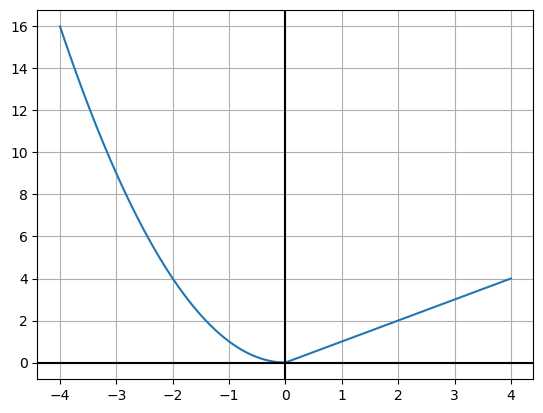

In [16]:
plt.plot(x, y)

# pynt
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.grid()
plt.show()

### Alternativ: `if/else`

Ein annan måte dette kan gjerast på er å bruka betingelsar og løkker. Dette kan me gjera slik:

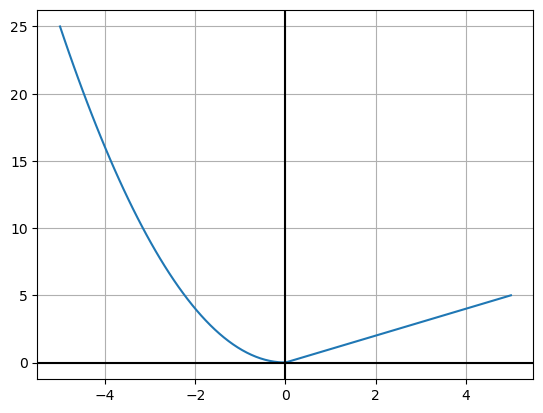

In [18]:
# definerer funksjonen
def f(x):
    if x <= 0:
        return x**2
    else:
        return x

# lager x-verdiar
x_verdiar = np.linspace(-5, 5, 100)

# rekner ut y-verdiane
y_verdiar = [f(x) for x in x_verdiar]

# plottar
plt.plot(x_verdiar, y_verdiar)

# pynt
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.grid()
plt.show()

### Diskontinuerlege funksjonar

Framgangsmåten over med `piecewise` kan brukast for funksjonar som er definert for alle $x$-verdiar mellom nederste og øverste del av definisjonsmengda. Om ein har ein funksjon med delt definisjonsmengde som td.

$$h(x) = \begin{cases}
x^2 & \text{for } x \leq 0 \\
-x^2 & \text{for } x \geq 2
\end{cases}$$

må ein gjera tilpassingar. Prøver først måten me gjorde det over:

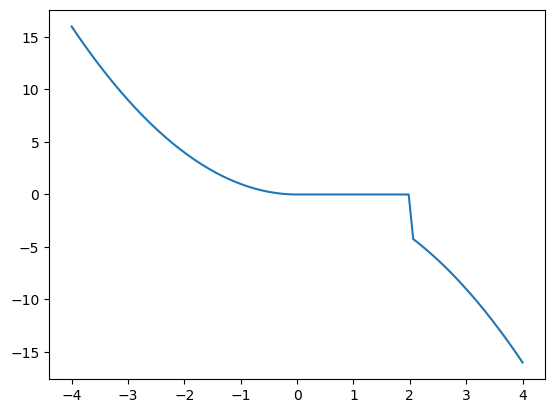

In [9]:
# definerer funksjonen
def h(x):
    return np.piecewise(x, [x <= 0, x >= 2], [lambda x: x**2, lambda x: -x**2])


# finn x og y
x = np.linspace(-4, 4, 100)
y = h(x)

# plottar
plt.plot(x, y)
plt.show()

Her viser utfordringa med denne typen funksjonar. I staden for å teikna to kurver som ikkje heng saman, vert funksjonsverdien $0$ når $x\in \langle 0, 2 \rangle$.  I `piecewise` sin [dokumentasjon](https://numpy.org/doc/stable/reference/generated/numpy.piecewise.html) finn me dette: 

> The output is the same shape and type as x and is found by calling the functions in funclist on the appropriate portions of x, as defined by the boolean arrays in condlist. **Portions not covered by any condition have a default value of 0**.

Måten å løysa det på er å definera kva som skal skje i intervallet der funksjonen ikkje er definert:

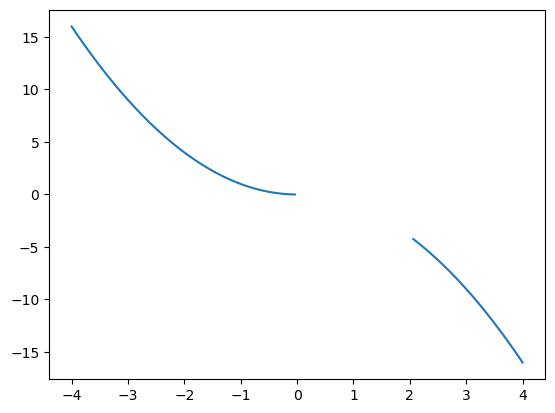

In [16]:
# definerer funksjonen (også mellom 0 og 2)
def h(x):
    return np.piecewise(x, [x <= 0, (x > 0) & (x < 2), x >= 2], [lambda x: x**2, np.nan, lambda x: -x**2])


# finn x og y
x = np.linspace(-4, 4, 100)
y = h(x)

# plottar
plt.plot(x, y)
plt.show()

Her er intervallet `(x > 0) & (x < 2)` definert ved funksjonen `np.nan` (*not a number*). På denne måten unngår me at funksjonsverdien vert sett til 0 automatisk i mellomrommet mellom dei to intervalla som utgjer definisjonsmengda. 